# 9단원 텍스트를 위한 인공 신경망

## 9-1 순차 데이터와 순환 신경망

### 순차 데이터

### 순환 신경망

### 셀의 가중치와 입출력

### 9-2 순환 신경망으로 IMDB 리뷰 분류하기

In [ ]:
from tensorflow.keras.datasets import imdb
(train_input , train_target) , (test_input , test_target) = imdb.load_data(num_words=500)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
print( train_input.shape , test_input.shape )

(25000,) (25000,)


In [ ]:
print(len(train_input[0]))

218


In [ ]:
print(len(train_input[1]))

189


In [ ]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split
train_input , val_input , train_target , val_target = train_test_split(train_input , train_target , test_size=0.2 , random_state=42)

In [ ]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [ ]:
print(np.mean(lengths) , np.median(lengths))

239.00925 178.0


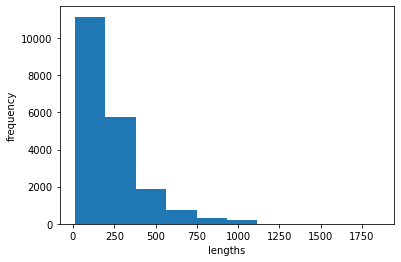

In [ ]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('lengths')
plt.ylabel('frequency')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input , maxlen=100)

In [ ]:
print(train_seq.shape)

(20000, 100)


In [ ]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [ ]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [ ]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [ ]:
val_seq = pad_sequences(val_input , maxlen=100)

### 순환 신경망 만들기

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8 , input_shape=(100,500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
train_oh = keras.utils.to_categorical(train_seq)

In [ ]:
print(train_oh.shape)

(20000, 100, 500)


In [ ]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
print(np.sum(train_oh[0][0]))

1.0


In [ ]:
val_oh = keras.utils.to_categorical(val_seq)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


### 순환 신경망 훈련하기

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer=rmsprop , loss='binary_crossentropy' , metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience= 3 , restore_best_weights=True)
history = model.fit(train_oh , train_target , epochs=100 , batch_size=64 , validation_data = (val_oh , val_target) , callbacks=[checkpoint_cb , early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 27s 80ms/step - loss: 0.7008 - accuracy: 0.4965 - val_loss: 0.6964 - val_accuracy: 0.5152
Epoch 2/100
313/313 [==============================] - 24s 76ms/step - loss: 0.6920 - accuracy: 0.5264 - val_loss: 0.6897 - val_accuracy: 0.5312
Epoch 3/100
313/313 [==============================] - 26s 82ms/step - loss: 0.6801 - accuracy: 0.5708 - val_loss: 0.6749 - val_accuracy: 0.5860
Epoch 4/100
313/313 [==============================] - 25s 79ms/step - loss: 0.6615 - accuracy: 0.6143 - val_loss: 0.6526 - val_accuracy: 0.6282
Epoch 5/100
313/313 [==============================] - 24s 78ms/step - loss: 0.6443 - accuracy: 0.6395 - val_loss: 0.6365 - val_accuracy: 0.6528
Epoch 6/100
313/313 [==============================] - 24s 76ms/step - loss: 0.6282 - accuracy: 0.6592 - val_loss: 0.6239 - val_accuracy: 0.6658
Epoch 7/100
313/313 [==============================] - 24s 77ms/step - loss: 0.6120 - accuracy: 0.6796 - val_loss: 0.6088 - val_ac

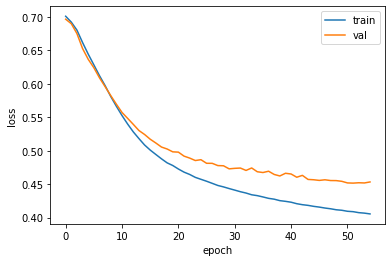

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train' , 'val'])
plt.show()

In [ ]:
print(train_seq.nbytes , train_oh.nbytes)

8000000 4000000000


### 단어 임베딩을 사용하기

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500 , 16 , input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop , loss='binary_crossentropy' , metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3 , restore_best_weights=True)
history = model2.fit(train_seq , train_target , epochs=100 , batch_size=64 , validation_data = (val_seq , val_target) , callbacks=[checkpoint_cb , early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 26ms/step - loss: 0.6886 - accuracy: 0.5368 - val_loss: 0.6772 - val_accuracy: 0.5946
Epoch 2/100
313/313 [==============================] - 9s 27ms/step - loss: 0.6551 - accuracy: 0.6560 - val_loss: 0.6448 - val_accuracy: 0.6798
Epoch 3/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6245 - accuracy: 0.7150 - val_loss: 0.6214 - val_accuracy: 0.7162
Epoch 4/100
313/313 [==============================] - 8s 26ms/step - loss: 0.5984 - accuracy: 0.7442 - val_loss: 0.5948 - val_accuracy: 0.7442
Epoch 5/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5750 - accuracy: 0.7612 - val_loss: 0.5745 - val_accuracy: 0.7604
Epoch 6/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5553 - accuracy: 0.7727 - val_loss: 0.5562 - val_accuracy: 0.7658
Epoch 7/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5376 - accuracy: 0.7808 - val_loss: 0.5442 - val_accuracy

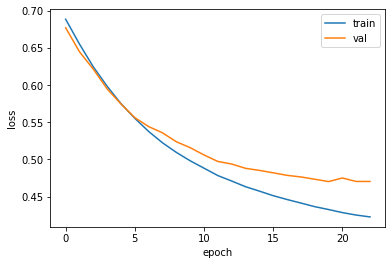

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train' , 'val'])
plt.show()

## 9-3 LSTM과 GRU 셀

### LSTM 구조

### LSTM 신경망 훈련하기

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input , train_target) , (test_input , test_target) = imdb.load_data(num_words=500)
train_input , val_input , train_target , val_target = train_test_split(train_input , train_target , test_size = 0.2 , random_state=42)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input , maxlen=100)
val_seq = pad_sequences(val_input , maxlen=100)

In [4]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500 , 16 , input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1 , activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [6]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy' , metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm=model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3,  restore_best_weights=True)
history = model.fit(train_seq, train_target , epochs=100 , batch_size=64 , validation_data = (val_seq, val_target) , callbacks=[ checkpoint_cb , early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 25s 66ms/step - loss: 0.6928 - accuracy: 0.5339 - val_loss: 0.6920 - val_accuracy: 0.5930
Epoch 2/100
313/313 [==============================] - 19s 61ms/step - loss: 0.6906 - accuracy: 0.6105 - val_loss: 0.6882 - val_accuracy: 0.6462
Epoch 3/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6811 - accuracy: 0.6581 - val_loss: 0.6671 - val_accuracy: 0.6522
Epoch 4/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6332 - accuracy: 0.7083 - val_loss: 0.6129 - val_accuracy: 0.7210
Epoch 5/100
313/313 [==============================] - 11s 36ms/step - loss: 0.5972 - accuracy: 0.7351 - val_loss: 0.5864 - val_accuracy: 0.7394
Epoch 6/100
313/313 [==============================] - 11s 34ms/step - loss: 0.5707 - accuracy: 0.7508 - val_loss: 0.5610 - val_accuracy: 0.7550
Epoch 7/100
313/313 [==============================] - 11s 34ms/step - loss: 0.5440 - accuracy: 0.7679 - val_loss: 0.5355 - val_ac

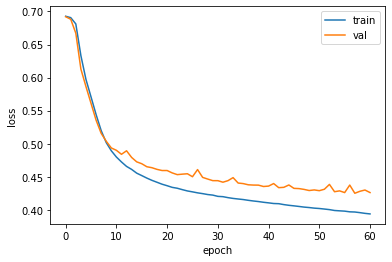

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train' , 'val'])
plt.show()

### 순환층에 드롭아웃 적용하기

In [8]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16 , input_length = 100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer = rmsprop , loss='binary_crossentropy' , metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3 , restore_best_weights=True)
history = model2.fit(train_seq , train_target , epochs=100 , batch_size = 64 , validation_data = (val_seq , val_target) , callbacks = [checkpoint_cb , early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 26s 71ms/step - loss: 0.6925 - accuracy: 0.5249 - val_loss: 0.6921 - val_accuracy: 0.5408
Epoch 2/100
313/313 [==============================] - 21s 66ms/step - loss: 0.6910 - accuracy: 0.5623 - val_loss: 0.6903 - val_accuracy: 0.5722
Epoch 3/100
313/313 [==============================] - 21s 67ms/step - loss: 0.6885 - accuracy: 0.5964 - val_loss: 0.6870 - val_accuracy: 0.6042
Epoch 4/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6832 - accuracy: 0.6272 - val_loss: 0.6801 - val_accuracy: 0.6310
Epoch 5/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6715 - accuracy: 0.6550 - val_loss: 0.6622 - val_accuracy: 0.6780
Epoch 6/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6281 - accuracy: 0.7013 - val_loss: 0.5840 - val_accuracy: 0.7192
Epoch 7/100
313/313 [==============================] - 11s 36ms/step - loss: 0.5642 - accuracy: 0.7262 - val_loss: 0.5513 - val_ac

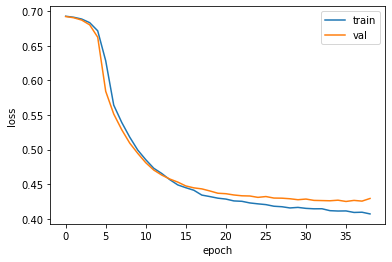

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train' , 'val'])
plt.show()

### 2개의 층을 연결하기

In [12]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500 , 16 , input_length=100))
model3.add(keras.layers.LSTM(8 , dropout=0.3 , return_sequences=True))
model3.add(keras.layers.LSTM(8 , dropout= 0.3))
model3.add(keras.layers.Dense(1 , activation='sigmoid'))

In [13]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer=rmsprop , loss='binary_crossentropy' , metrics=['accuracy'])
checheckpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3 , restore_best_weights=True)
history = model3.fit(train_seq , train_target , epochs=100 , batch_size=64 , validation_data=(val_seq , val_target) , callbacks=[checkpoint_cb , early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 47s 129ms/step - loss: 0.6924 - accuracy: 0.5343 - val_loss: 0.6911 - val_accuracy: 0.5826
Epoch 2/100
313/313 [==============================] - 33s 105ms/step - loss: 0.6878 - accuracy: 0.6233 - val_loss: 0.6812 - val_accuracy: 0.6570
Epoch 3/100
313/313 [==============================] - 22s 71ms/step - loss: 0.6480 - accuracy: 0.6733 - val_loss: 0.5962 - val_accuracy: 0.7000
Epoch 4/100
313/313 [==============================] - 22s 70ms/step - loss: 0.5772 - accuracy: 0.7084 - val_loss: 0.5568 - val_accuracy: 0.7344
Epoch 5/100
313/313 [==============================] - 22s 70ms/step - loss: 0.5480 - accuracy: 0.7326 - val_loss: 0.5276 - val_accuracy: 0.7542
Epoch 6/100
313/313 [==============================] - 22s 70ms/step - loss: 0.5241 - accuracy: 0.7503 - val_loss: 0.5104 - val_accuracy: 0.7662
Epoch 7/100
313/313 [==============================] - 22s 71ms/step - loss: 0.5041 - accuracy: 0.7631 - val_loss: 0.4915 - val_

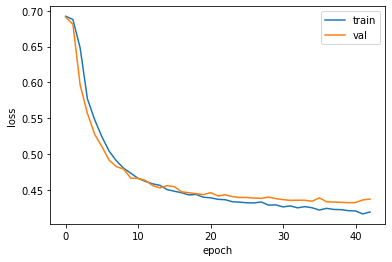

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train' , 'val'])
plt.show()

### GRU 구조

In [17]:
model4 =keras.Sequential()
model4.add(keras.layers.Embedding(500 , 16 , input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [18]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [19]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop , loss='binary_crossentropy' , metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3 , restore_best_weights=True)
history = model4.fit(train_seq , train_target , epochs=100 , batch_size = 64 , validation_data = (val_seq , val_target) , callbacks=[checkpoint_cb , early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 41ms/step - loss: 0.6923 - accuracy: 0.5219 - val_loss: 0.6912 - val_accuracy: 0.5598
Epoch 2/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6900 - accuracy: 0.5752 - val_loss: 0.6885 - val_accuracy: 0.5808
Epoch 3/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6859 - accuracy: 0.6026 - val_loss: 0.6835 - val_accuracy: 0.6084
Epoch 4/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6786 - accuracy: 0.6234 - val_loss: 0.6747 - val_accuracy: 0.6228
Epoch 5/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6651 - accuracy: 0.6464 - val_loss: 0.6569 - val_accuracy: 0.6492
Epoch 6/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6384 - accuracy: 0.6773 - val_loss: 0.6210 - val_accuracy: 0.6938
Epoch 7/100
313/313 [==============================] - 12s 39ms/step - loss: 0.5768 - accuracy: 0.7223 - val_loss: 0.5459 - val_ac

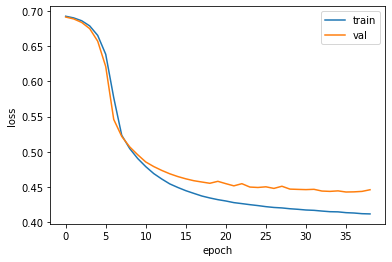

In [24]:
plt.plot( history.history[ 'loss' ] )
plt.plot( history.history[ 'val_loss' ] )
plt.xlabel( 'epoch' )
plt.ylabel( 'loss' )
plt.legend([ 'train' , 'val' ])
plt.show( )